In [32]:
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


View Dataset Details¶



In [11]:
import os
import glob
base_dir = '/content/gdrive/MyDrive/cell_images'
#base_dir = os.path.join('./cell_images')
infected_dir = os.path.join(base_dir,'Parasitized')
healthy_dir = os.path.join(base_dir,'Uninfected')

infected_files = glob.glob(infected_dir+'/*.png')
healthy_files = glob.glob(healthy_dir+'/*.png')
len(infected_files), len(healthy_files)


(400, 400)

In [12]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

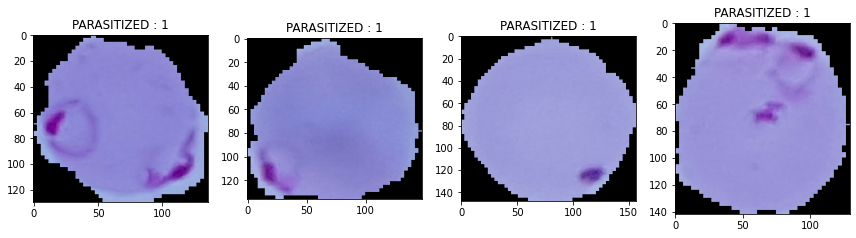

In [16]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(infected_files[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

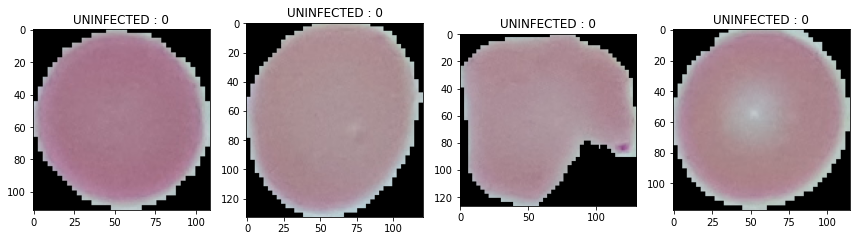

In [17]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(healthy_files[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [28]:
data = []
labels = []
for img in infected_files:
    try:
        img_read = plt.imread(img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in healthy_files:
    try:
        img_read = plt.imread(img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

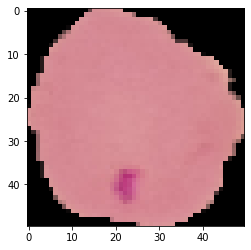

In [30]:
plt.imshow(data[11])
plt.show()

In [33]:
image_data = np.array(data)
labels = np.array(labels)


In [34]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]
print(labels)

[0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1
 1 0 1 1 1 0 0 1 1 1 0 0 

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [36]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [37]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (640, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (160, 50, 50, 3)
SHAPE OF TRAINING LABELS : (640, 2)
SHAPE OF TESTING LABELS : (160, 2)


In [38]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [39]:
import tensorflow as tf

tf.__version__


'2.4.1'

In [49]:
INPUT_SHAPE = (50, 50, 3)
BATCH_SIZE = 5
NUM_CLASSES = 2
EPOCHS = 20

Load and Resize Images


In [64]:
vgg = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', 
                                        input_shape=INPUT_SHAPE)
vgg.trainable =False
# Freeze the layers
for layer in vgg.layers:
    layer.trainable = False
    
base_vgg = vgg
base_out = base_vgg.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.5)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.5)(hidden2)

out = tf.keras.layers.Dense(2, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=base_vgg.input, outputs=out)
model.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()



Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 56, 56, 3)    0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 25, 25, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 27, 27, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [65]:
print("Total Layers:", len(model.layers))
print("Total trainable layers:", sum([1 for l in model.layers if l.trainable]))


Total Layers: 196
Total trainable layers: 6


In [66]:
import datetime

logdir = os.path.join('/home/dipanzan_sarkar/projects/tensorboard_logs', 
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [67]:
history = model.fit(x_train, y_train, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS)


Epoch 1/20
32/32 [==============================] - 10s 216ms/step - loss: 1.1812 - accuracy: 0.8708
Epoch 2/20
32/32 [==============================] - 7s 212ms/step - loss: 0.9396 - accuracy: 0.9756
Epoch 3/20
32/32 [==============================] - 7s 215ms/step - loss: 0.0541 - accuracy: 0.9902
Epoch 4/20
32/32 [==============================] - 7s 217ms/step - loss: 0.2038 - accuracy: 0.9873
Epoch 5/20
32/32 [==============================] - 7s 215ms/step - loss: 0.4074 - accuracy: 0.9830
Epoch 6/20
32/32 [==============================] - 7s 215ms/step - loss: 0.0540 - accuracy: 0.9961
Epoch 7/20
32/32 [==============================] - 7s 214ms/step - loss: 0.0945 - accuracy: 0.9948
Epoch 8/20
32/32 [==============================] - 7s 218ms/step - loss: 0.0412 - accuracy: 0.9982
Epoch 9/20
32/32 [==============================] - 7s 214ms/step - loss: 0.0026 - accuracy: 0.9989
Epoch 10/20
32/32 [==============================] - 7s 212ms/step - loss: 4.1402e-08 - accuracy: 1

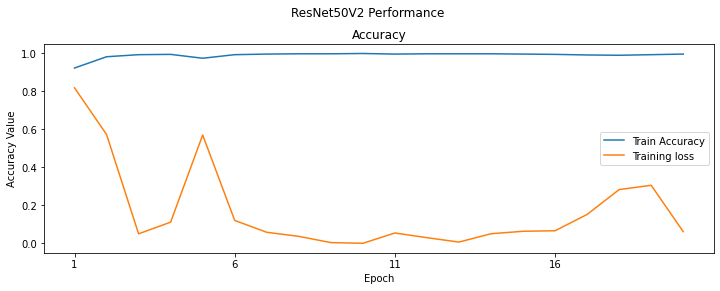

In [76]:
f, (ax1) = plt.subplots(1, figsize=(12, 4))
t = f.suptitle('ResNet50V2 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['loss'], label='Training loss')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

In [72]:
#evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5/5 [==============================] - 2s 283ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [73]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.0
ACCURACY : 1.0
